In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.base import clone, BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv('House-Price-Prediction-clean.csv')

Saving House-Price-Prediction-clean.csv to House-Price-Prediction-clean.csv


In [ ]:
dataset

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,additional=1):
        self.additional = additional
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        if self.additional==1:
            X["HouseArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            # X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["WoodDeckSF"] + ["OpenPorchSF"] + ["PoolArea"]
            # X["HouseAge"] = X["YrSold"] - X["YearBuilt"]
        elif self.additional == 2:
            X["HouseArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["WoodDeckSF"] + X["OpenPorchSF"] + X["PoolArea"]
            # X["HouseAge"] = X["YrSold"] - X["YearBuilt"]
        else :
            X["HouseArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["WoodDeckSF"] + X["OpenPorchSF"] + X["PoolArea"]
            X["HouseAge"]  = X["YrSold"] - X["YearBuilt"]

        return X

In [ ]:
# PIPELINE
pipe = Pipeline([('add_feature', CombinedAttributesAdder(additional=3))])
full_data = pd.read_csv('House-Price-Prediction-clean.csv')

FullDataPipe = pipe.fit_transform(full_data.drop('Id',1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
corr_matrix = FullDataPipe.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
TotalArea        0.813495
OverallQual      0.790982
HouseArea        0.782260
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
MiscVal         -0.021190
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
HouseAge        -0.523350
Name: SalePrice, dtype: float64

In [ ]:
label_1 =  FullDataPipe[FullDataPipe['SalePrice']>100000]
label_2 = label_1[label_1['SalePrice']<400000]

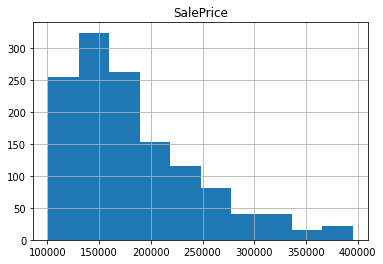

In [ ]:
# hist of SalePrice
label_2.hist('SalePrice',bins=10)
plt.show()

In [ ]:
df_reg = label_2[['SalePrice', 'TotalArea', 'OverallQual', 'HouseArea', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'HouseAge']]
df_reg_low = label_2[['SalePrice','TotalArea','TotalBsmtSF','MiscVal','LotArea','BsmtUnfSF','BsmtFinSF1']]
df_reg_high= label_2[['SalePrice','KitchenAbvGr','BedroomAbvGr','OverallQual','BsmtFullBath','GarageCars']]

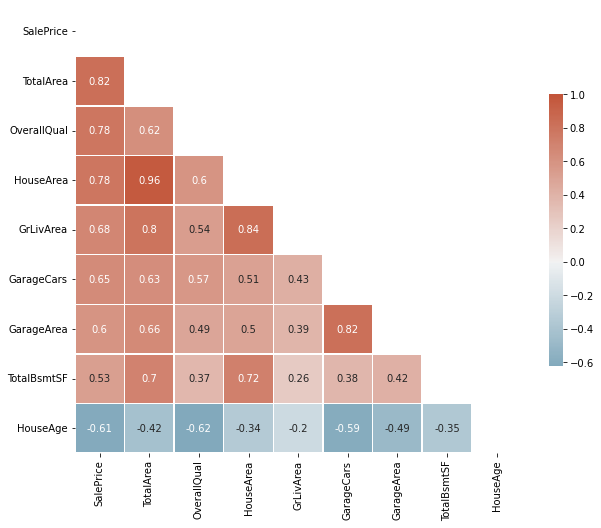

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
mat = df_reg.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#### do split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

# Regression MLP

In [ ]:
def print_evaluate(true, predicted):  
    # mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    # print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
X = df_reg.drop('SalePrice', 1)
y = df_reg['SalePrice']/10000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
print(X_train.shape[0], X_valid.shape[0], X_test.shape[0])

735 246 328


In [ ]:
# 5 hidden neurons
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(3, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               900       
                                                                 
 dense_4 (Dense)             (None, 3)                 303       
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(8, 100) dtype=float32, numpy=
 array([[ 1.13245890e-01, -7.57160783e-02,  3.26450318e-02,
         -2.44593322e-02, -9.76490825e-02, -3.48812938e-02,
          6.07658774e-02,  9.00670141e-02, -8.99169892e-02,
          1.84963122e-01,  7.72943348e-02, -9.17278379e-02,
          1.75558761e-01, -1.87348977e-01,  3.21469754e-02,
         -1.15834266e-01,  1.06248274e-01, -1.08051598e-02,
         -1.74899846e-02,  1.83588460e-01,  8.45018476e-02,
         -1.89727470e-01, -2.28114262e-01, -5.84441423e-03,
          3.92664820e-02, -4.14242893e-02,  1.09321073e-01,
          2.04678878e-01,  1.40536129e-02,  2.19901577e-01,
          1.80977836e-01, -1.85834274e-01, -2.62120813e-02,
          1.34421751e-01, -1.25746578e-02,  1.88060299e-01,
         -2.15476215e-01,  1.75221249e-01,  5.03709465e-02,
         -1.74593881e-01, -2.22805142e-02, -1.19861707e-01,
         -7.17607439e-02,  3.87244672e-02,  1.52255163e-01,
          1.54917315e-01,  1.7

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.01))
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid))


Epoch 1/200
23/23 [==============================] - 1s 13ms/step - loss: 209.3608 - val_loss: 53.1341
Epoch 2/200
23/23 [==============================] - 0s 3ms/step - loss: 64.3087 - val_loss: 25.6007
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 30.3809 - val_loss: 34.0822
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 27.0881 - val_loss: 60.0395
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 15.3805 - val_loss: 21.0192
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 19.6108 - val_loss: 21.6437
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 15.1084 - val_loss: 14.2977
Epoch 8/200
23/23 [==============================] - 0s 3ms/step - loss: 8.1900 - val_loss: 8.3778
Epoch 9/200
23/23 [==============================] - 0s 3ms/step - loss: 9.1850 - val_loss: 7.6831
Epoch 10/200
23/23 [==============================] - 0s 3ms/step - loss: 10.5654 - val_loss:

In [ ]:
model.weights

[<tf.Variable 'dense_330/kernel:0' shape=(8, 5) dtype=float32, numpy=
 array([[ 0.30827403, -0.2805076 ,  0.15501592,  0.06491606, -0.47768143],
        [ 1.086574  ,  0.72445273,  0.60331315, -0.34870654, -0.10457968],
        [-0.46156603,  0.0732405 , -0.49015358, -0.09131881,  0.31920213],
        [ 0.51467264, -0.6784652 , -0.18651365, -0.00242529, -0.1349492 ],
        [ 0.7575608 ,  0.3484229 ,  0.02978403,  0.43673396,  0.07308689],
        [-0.40817246, -0.28157276, -0.24428974,  0.62638956, -0.15643929],
        [-0.10464804, -0.4871049 ,  0.24995454, -0.17437242,  0.19905311],
        [-0.29597414,  0.13318379,  0.29446608, -0.30484176,  0.58145154]],
       dtype=float32)>,
 <tf.Variable 'dense_330/bias:0' shape=(5,) dtype=float32, numpy=
 array([ 1.2651005 ,  1.0897661 ,  1.9320151 ,  0.15615962, -0.49098328],
       dtype=float32)>,
 <tf.Variable 'dense_331/kernel:0' shape=(5, 3) dtype=float32, numpy=
 array([[ 1.053399  ,  0.23422147,  0.42951217],
        [-1.295406  , 

In [ ]:
mse_test = model.evaluate(X_valid, y_valid)

8/8 [==============================] - 0s 2ms/step - loss: 8.3016


In [ ]:
# mse 
y_pred = model.predict(X_valid).reshape(-1)
dif = y_valid - y_pred
np.dot(dif, dif)/len(y_valid)

8/8 [==============================] - 0s 2ms/step


8.301560946175533

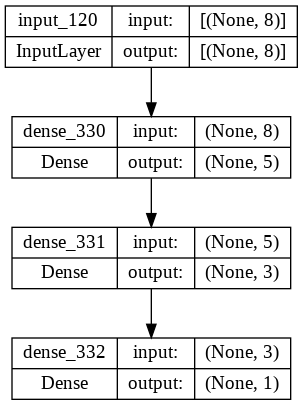

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

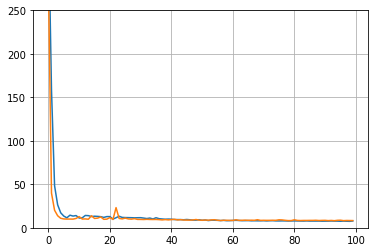

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 250)
plt.show()

### 5,3,1 model, epoch 30, learning rate=0.01

In [ ]:
model1 = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(5, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(3, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model1.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.01))
history1 = model1.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
mse_test1 = model1.evaluate(X_valid, y_valid)

Epoch 1/100
23/23 [==============================] - 1s 8ms/step - loss: 197.6280 - val_loss: 12.5959
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 46.0671 - val_loss: 41.5261
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 52.3859 - val_loss: 15.4588
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 38.3484 - val_loss: 12.9077
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 14.4487 - val_loss: 10.6921
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 17.4314 - val_loss: 17.1010
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 12.0516 - val_loss: 12.6342
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 11.3241 - val_loss: 8.3122
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 24.6048 - val_loss: 12.2009
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 11.7432 - val_los

### 7,5,3,1 model, 30 epoch and rate=0.001

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model2 = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(7, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(5, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(3, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model2.summary()

Model: "sequential_123"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_336 (Dense)           (None, 7)                 63        
                                                                 
 dense_337 (Dense)           (None, 5)                 40        
                                                                 
 dense_338 (Dense)           (None, 3)                 18        
                                                                 
 dense_339 (Dense)           (None, 1)                 4         
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.01))
history2 = model2.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
mse_test2 = model2.evaluate(X_valid, y_valid)

Epoch 1/100
23/23 [==============================] - 1s 10ms/step - loss: 260.1095 - val_loss: 190.0417
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 146.4185 - val_loss: 96.5372
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 82.7788 - val_loss: 59.9609
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 57.7447 - val_loss: 45.8986
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 47.8003 - val_loss: 40.4694
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 43.7160 - val_loss: 37.5799
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 36.1455 - val_loss: 29.3410
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 30.0303 - val_loss: 25.8824
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 26.8713 - val_loss: 23.6140
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 24.9182 - val

### 7,1 model, 100 epoch, rate=0.01

In [ ]:
model3 = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(7, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model3.summary()

Model: "sequential_124"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_340 (Dense)           (None, 7)                 63        
                                                                 
 dense_341 (Dense)           (None, 1)                 8         
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.01))
history3 = model3.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
mse_test3 = model3.evaluate(X_valid, y_valid)

Epoch 1/100
23/23 [==============================] - 1s 8ms/step - loss: 94.9746 - val_loss: 13.5518
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 16.8801 - val_loss: 10.0385
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 27.5915 - val_loss: 10.0685
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 19.9669 - val_loss: 8.5495
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 18.2493 - val_loss: 8.4609
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 13.0260 - val_loss: 8.8107
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 9.2262 - val_loss: 8.3336
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 15.9910 - val_loss: 8.1515
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 14.9251 - val_loss: 8.8092
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 17.1419 - val_loss: 9.48

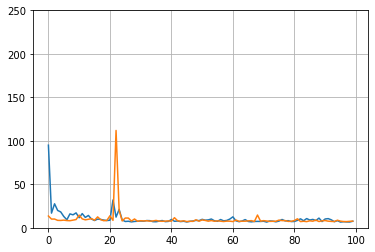

In [ ]:
plt.plot(pd.DataFrame(history3.history))
plt.grid(True)
plt.gca().set_ylim(0, 250)
plt.show()

### 5,1 model, 100 epoch, rate=0.01

In [ ]:
model4 = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(5, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model4.summary()

Model: "sequential_125"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_342 (Dense)           (None, 5)                 45        
                                                                 
 dense_343 (Dense)           (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.01))
history4 = model4.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
mse_test4 = model4.evaluate(X_valid, y_valid)

Epoch 1/100
23/23 [==============================] - 1s 11ms/step - loss: 135.9763 - val_loss: 14.9428
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 45.9359 - val_loss: 10.2226
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 26.9668 - val_loss: 10.2746
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 22.6689 - val_loss: 9.0373
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 18.9893 - val_loss: 9.5918
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 14.7491 - val_loss: 9.2869
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 10.9936 - val_loss: 8.8058
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 19.9912 - val_loss: 9.2441
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 17.6140 - val_loss: 9.4067
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 21.1250 - val_loss: 1

### 3,1 model, 30 epoch, rate=0.01

In [ ]:
model5 = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(3, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model5.summary()

Model: "sequential_126"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_344 (Dense)           (None, 3)                 27        
                                                                 
 dense_345 (Dense)           (None, 1)                 4         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model5.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.01))
history5 = model5.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
mse_test5 = model5.evaluate(X_valid, y_valid)

Epoch 1/100
23/23 [==============================] - 0s 8ms/step - loss: 102.0863 - val_loss: 13.2835
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 16.1648 - val_loss: 8.9313
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 30.3199 - val_loss: 9.6918
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 21.8503 - val_loss: 8.9449
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 19.8067 - val_loss: 9.3799
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 15.8692 - val_loss: 9.1619
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 11.1626 - val_loss: 8.7751
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 19.1785 - val_loss: 8.7798
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 17.0806 - val_loss: 9.5139
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 21.6065 - val_loss: 10.4

### 1 model, 30 epoch rate=0.01

In [ ]:
model6 = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model6.summary()

Model: "sequential_127"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_346 (Dense)           (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model6.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.01))
history6 = model6.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
mse_test6 = model6.evaluate(X_valid, y_valid)

Epoch 1/100
23/23 [==============================] - 1s 14ms/step - loss: 251.0940 - val_loss: 152.3804
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 104.6612 - val_loss: 67.7527
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 49.4551 - val_loss: 33.6629
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 27.2780 - val_loss: 19.7616
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 18.4333 - val_loss: 14.0679
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 14.9303 - val_loss: 11.5077
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 13.3850 - val_loss: 10.4169
Epoch 8/100
23/23 [==============================] - 0s 6ms/step - loss: 13.0742 - val_loss: 9.8793
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 12.7002 - val_loss: 9.5862
Epoch 10/100
23/23 [==============================] - 0s 12ms/step - loss: 12.6347 - val_

### table of different approach

In [ ]:
from tabulate import tabulate

table = [['model_name','describe','MSE'], 
         ['model', 'Dense 5,3,1; epochs=100, rate=0.001',mse_test], 
         ['model1','Dense 5,3,1; epochs=100, rate=0.01', mse_test1],
         ['model2', 'Dense 7,5,3,1; epochs=100, rate=0.01', mse_test2],
         ['model3', 'Dense 7,1; epochs=100, rate=0.01', mse_test3],
         ['model4', 'Dense 5,1; epochs=100, rate=0.01', mse_test4],
         ['model5', 'Dense 3,1; epochs=100, rate=0.01', mse_test5],
         ['model6', 'Dense 1; epochs=100, rate=0.01', mse_test6]]
         
print(tabulate(table))

----------  ------------------------------------  -----------------
model_name  describe                              MSE
model       Dense 5,3,1; epochs=100, rate=0.001   8.301560401916504
model1      Dense 5,3,1; epochs=100, rate=0.01    8.702272415161133
model2      Dense 7,5,3,1; epochs=100, rate=0.01  7.851003170013428
model3      Dense 7,1; epochs=100, rate=0.01      7.675676345825195
model4      Dense 5,1; epochs=100, rate=0.01      8.64540958404541
model5      Dense 3,1; epochs=100, rate=0.01      8.037948608398438
model6      Dense 1; epochs=100, rate=0.01        9.284250259399414
----------  ------------------------------------  -----------------


### model3 selected!!!

In [ ]:
classifier1 = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(7, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
classifier1.summary()

Model: "sequential_139"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_369 (Dense)           (None, 7)                 63        
                                                                 
 dense_370 (Dense)           (None, 1)                 8         
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier1.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.01))
history_classifier1 = classifier1.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
30/30 [==============================] - 0s 6ms/step - loss: 125.8434 - val_loss: 7.9819
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 14.7802 - val_loss: 7.4775
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 11.6408 - val_loss: 9.2444
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 23.3761 - val_loss: 14.3189
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 14.2866 - val_loss: 6.1585
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 14.1177 - val_loss: 6.9787
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 14.1139 - val_loss: 4.9897
Epoch 8/100
30/30 [==============================] - 0s 3ms/step - loss: 14.4934 - val_loss: 5.9006
Epoch 9/100
30/30 [==============================] - 0s 4ms/step - loss: 14.0620 - val_loss: 8.0020
Epoch 10/100
30/30 [==============================] - 0s 4ms/step - loss: 13.2713 - val_loss: 17.5

In [ ]:
y_pred1 = classifier1.predict(X_test)
mse_class1 = mean_squared_error(y_test, y_pred1)
r2_square_class1 = r2_score(y_test, y_pred1)
print_evaluate(y_test,y_pred1)

7/7 [==============================] - 0s 2ms/step
MSE: 4.786880449982313
RMSE: 2.1878940673584526
R2 Square 0.8329478089785853
__________________________________


### classifier2

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.55,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,test_size=0.55, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
classifier2 = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(7, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
classifier2.summary()

Model: "sequential_140"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_371 (Dense)           (None, 7)                 63        
                                                                 
 dense_372 (Dense)           (None, 1)                 8         
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier2.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.01))
history_classifier2 = classifier2.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
9/9 [==============================] - 1s 26ms/step - loss: 153.0630 - val_loss: 31.6223
Epoch 2/100
9/9 [==============================] - 0s 12ms/step - loss: 19.3224 - val_loss: 17.7397
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 11.9201 - val_loss: 14.1358
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 9.3397 - val_loss: 10.9906
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 8.2572 - val_loss: 11.7280
Epoch 6/100
9/9 [==============================] - 0s 13ms/step - loss: 8.8771 - val_loss: 10.2341
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 7.4607 - val_loss: 9.6508
Epoch 8/100
9/9 [==============================] - 0s 12ms/step - loss: 8.0094 - val_loss: 10.0329
Epoch 9/100
9/9 [==============================] - 0s 12ms/step - loss: 7.5176 - val_loss: 9.5794
Epoch 10/100
9/9 [==============================] - 0s 12ms/step - loss: 7.9618 - val_loss: 12.8820
Epoch 11/1

In [ ]:
y_pred = classifier2.predict(X_test)
mse_class2 = mean_squared_error(y_test, y_pred)
r2_square_class2 = r2_score(y_test, y_pred)
print_evaluate(y_test,y_pred)

23/23 [==============================] - 0s 1ms/step
MSE: 8.664608066930981
RMSE: 2.9435706322306894
R2 Square 0.7743703317210787
__________________________________


### classifier3

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.85,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,test_size=0.55, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
classifier3 = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(7, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
classifier3.summary()

Model: "sequential_141"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_373 (Dense)           (None, 7)                 63        
                                                                 
 dense_374 (Dense)           (None, 1)                 8         
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier3.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.01))
history_classifier3 = classifier3.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
3/3 [==============================] - 0s 82ms/step - loss: 340.6091 - val_loss: 200.6018
Epoch 2/100
3/3 [==============================] - 0s 43ms/step - loss: 179.7996 - val_loss: 55.4598
Epoch 3/100
3/3 [==============================] - 0s 43ms/step - loss: 62.1036 - val_loss: 73.2933
Epoch 4/100
3/3 [==============================] - 0s 32ms/step - loss: 56.8210 - val_loss: 30.4035
Epoch 5/100
3/3 [==============================] - 0s 38ms/step - loss: 27.2706 - val_loss: 23.0200
Epoch 6/100
3/3 [==============================] - 0s 35ms/step - loss: 22.3579 - val_loss: 18.5407
Epoch 7/100
3/3 [==============================] - 0s 45ms/step - loss: 15.4282 - val_loss: 15.1362
Epoch 8/100
3/3 [==============================] - 0s 45ms/step - loss: 19.5832 - val_loss: 18.5672
Epoch 9/100
3/3 [==============================] - 0s 44ms/step - loss: 14.0064 - val_loss: 15.0367
Epoch 10/100
3/3 [==============================] - 0s 43ms/step - loss: 12.3710 - val_loss: 13.8

In [ ]:
y_pred = classifier3.predict(X_test)
mse_class3 = mean_squared_error(y_test, y_pred)
r2_square_class3 = r2_score(y_test, y_pred)
print_evaluate(y_test,y_pred)

35/35 [==============================] - 0s 1ms/step
MSE: 10.707318392954942
RMSE: 3.272203904550409
R2 Square 0.7205834655106036
__________________________________


### classifier4

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
classifier4 = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(7, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])


In [ ]:
classifier4.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.01))
history_classifier4 = classifier4.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
27/27 [==============================] - 1s 8ms/step - loss: 97.9091 - val_loss: 11.2989
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 32.1914 - val_loss: 11.2571
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 12.6674 - val_loss: 20.3690
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 41.0105 - val_loss: 6.7361
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 13.0549 - val_loss: 8.3760
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 11.3577 - val_loss: 6.3441
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 10.5779 - val_loss: 9.3019
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 11.9796 - val_loss: 7.9666
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 10.3015 - val_loss: 17.1166
Epoch 10/100
27/27 [==============================] - 0s 4ms/step - loss: 9.2424 - val_loss: 11.

In [ ]:
y_pred = classifier4.predict(X_test)
mse_class4 = mean_squared_error(y_test, y_pred)
r2_square_class4 = r2_score(y_test, y_pred)
print_evaluate(y_test,y_pred)

9/9 [==============================] - 0s 2ms/step
MSE: 5.91646727329234
RMSE: 2.4323789329157455
R2 Square 0.805704583766535
__________________________________


### table of 3 classifiers

In [ ]:
from tabulate import tabulate

table = [['model_name','describe','MSE', 'R2_Score'], 
         ['classifier1', 'train:test = 0.75: 0.25',mse_class1, r2_square_class1], 
         ['classifier2', 'train:test = 0.45: 0.55',mse_class2, r2_square_class2], 
         ['classifier3', 'train:test = 0.15: 0.85',mse_class3, r2_square_class3], 
         ['classifier4', 'train:test = 0.80: 0.20',mse_class4, r2_square_class4], 
         ]
         
print(tabulate(table))

-----------  -----------------------  ------------------  ------------------
model_name   describe                 MSE                 R2_Score
classifier1  train:test = 0.75: 0.25  4.786880449982313   0.8329478089785853
classifier2  train:test = 0.45: 0.55  8.664608066930981   0.7743703317210787
classifier3  train:test = 0.15: 0.85  10.707318392954942  0.7205834655106036
classifier4  train:test = 0.85: 0.15  5.91646727329234    0.805704583766535
-----------  -----------------------  ------------------  ------------------
